## Observations and Insights 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Desktop/Mouse_metadata.csv"
study_results_path = "../Desktop/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df.duplicated(['Mouse ID',])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df.drop_duplicates("Mouse ID")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [23]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean','median','var','std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,161,161,161,161,161,161,161
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


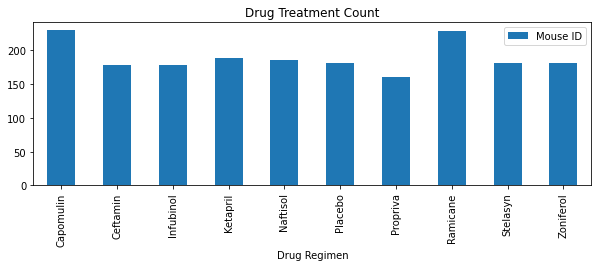

<Figure size 432x288 with 0 Axes>

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs_df.plot(kind="bar", figsize=(10,3))
plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


Text(0, 0.5, '')

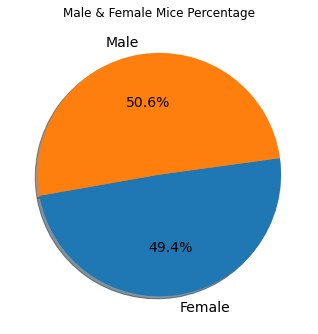

In [50]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [51]:
 plt.clf()
plt.cla()
plt.close()

(-1.1192168963081732,
 1.1079352522711863,
 -1.1167571903773796,
 1.1085810220189514)

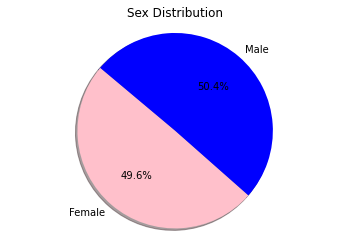

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [123, 125]
colors = ["pink", "blue"]
plt.pie(sizes, labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow=True, startangle=140)
plt.title("Sex Distribution")
plt.axis("equal")

In [53]:
 plt.clf()
plt.cla()
plt.close()

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#Get defined data for the problem: 
qob_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
qob_df = qob_df.sort_values(["Timepoint"], ascending=False)
qob_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
939,h531,Ceftamin,Male,5,27,0,45.0,0
1153,l733,Ceftamin,Female,4,30,0,45.0,0
1123,l661,Ceftamin,Male,18,26,0,45.0,0
1120,l558,Ceftamin,Female,13,30,0,45.0,0
...,...,...,...,...,...,...,...,...
290,b742,Capomulin,Male,7,21,0,45.0,0
283,c458,Ramicane,Female,23,20,0,45.0,0
273,l897,Capomulin,Male,17,19,0,45.0,0
263,d251,Ramicane,Female,8,19,0,45.0,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse s185 Tumor Volume vs. Time Point with Capomulin')

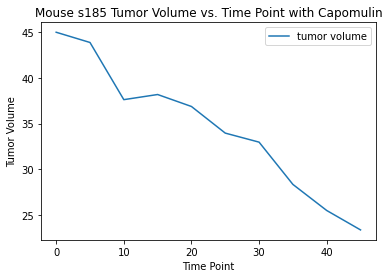

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplt_df = pd.DataFrame({
   'tumor volume': [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 33.949940, 32.959671, 28.328531, 25.472143, 23.343598]
      }, index = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
lines = lineplt_df.plot.line()

plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.title("Mouse s185 Tumor Volume vs. Time Point with Capomulin")

NameError: name 'each_mouse_weight' is not defined

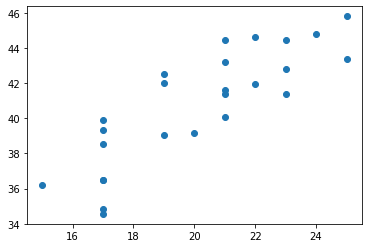

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regime
y_values = [41.963636, 40.083699, 36.505973, 41.990097, 44.613344, 44.805810, 39.141053, 44.465236, 43.216925, 44.434474, 42.507261, 34.847470, 39.049816, 45.798970, 36.509212, 43.367364, 34.559143, 42.803733, 39.328725, 39.887495, 41.581595, 41.384825, 41.352452, 36.182040, 38.506829]
x_values = [22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17, 23, 17, 17, 21, 23, 21, 15, 17]
plt.scatter(x_values, y_values)
model = st.linregress(each_mouse_weight,avg_tumor_vol)
y_values = each_mouse_weight*model[0]+model[1]
plt.plot(each_mouse_weight, y_values, color ='r')
plt.xlabel('mouse weight (g)')
plt.ylabel('average tumor volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin ')
plt.show()

## Correlation and Regression

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_capo["Weight (g)"]
y_values = avg_capo["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

NameError: name 'avg_capo' is not defined